<a href="https://colab.research.google.com/github/Iso-latte/MachineLearningMidterm/blob/main/MLMidterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resources:
 - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
 - https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
 - https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
 - Class materials
 - Blair Ednie
 - Chatgpt (Help with understanding plotting)

<h1><b>Machine Learning Midterm:</b>

- Models used:
    - Decision Tree Classifier
    - Logistic Regression
    - Support Vector Machine

<h1><b>REPORT:</b>

- <h2><b>Model One: Logistic Regression</b></h2>

    - Hyperparameters:
        - max iterations changed to 1000
            - This was because I was getting errors because of how many iterations the algorithm was doing. This seemed to help let the algorithm complete fully
    - Mean test time, mean fit time, and mean score time
      - Mean Test Score: 0.9733333333333334
      - Mean Fit Time: 0.019926166534423827
      - Mean Score Time: 0.0023434638977050783
    - Accuracy
      - Accuracy: 0.98
    - Classification Report (Numbers are the label encoded values)
      - Setosa [0] Precision: 1.00
      - Setosa [0] Recall: 1.00
      - Setosa [0] F1-Score: 1.00

      - Versicolor [1] Precision: 1.00
      - Versicolor [1] Recall: 0.94
      - Versicolor [1] F1-Score: 0.97

      - Virginica [2] Precision: 0.92
      - Virginica [2] Recall: 1.00
      - Virginica [2] F1-Score: 0.96

- <h2><b>Model Two: Support Vector Machine</b></h2>

    - Hyperparameters:
      - kernal('poly','rbf')
      - 'C' : [1,10]
      - svm.SVC()
    - Best parameters:
      - C = 10
      - kernal = 'rbf'
    - Mean test time, mean fit time, and mean score time
      - Mean Test Score: 0.9800000000000001
      - Mean Fit Time: 0.10444850921630859
      - Mean Score Time: 0.001841592788696289
    - Accuracy
      - Accuracy: 0.98
    - Classification Report (Numbers are the label encoded values)
      - Setosa [0] Precision: 1.00
      - Setosa [0] Recall: 1.00
      - Setosa [0] F1-Score: 1.00

      - Versicolor [1] Precision: 1.00
      - Versicolor [1] Recall: 0.94
      - Versicolor [1] F1-Score: 0.97

      - Virginica [2] Precision: 0.92
      - Virginica [2] Recall: 1.00
      - Virginica [2] F1-Score: 0.96


- <h2><b>Model Three: Decision Tree Classifier</b></h2>

    - Hyperparameters:
      - None
    - Mean test time, mean fit time, and mean score time
      - Mean Test Score: 0.9600000000000002
      - Mean Fit Time: 0.0024391651153564454
      - Mean Score Time: 0.0018893718719482423
    - Accuracy
      - Accuracy: 0.98
    - Classification Report (Numbers are the label encoded values)
      - Setosa [0] Precision: 1.00
      - Setosa [0] Recall: 1.00
      - Setosa [0] F1-Score: 1.00

      - Versicolor [1] Precision: 1.00
      - Versicolor [1] Recall: 0.94
      - Versicolor [1] F1-Score: 0.97

      - Virginica [2] Precision: 0.92
      - Virginica [2] Recall: 1.00
      - Virginica [2] F1-Score: 0.96


- <h2><b>Overall Conclusion:</b></h2>
  
  - Evaulation of Classification Reports
    - All the three models got the same scores which makes me think that the dataset was too small to get an effective conclusion about which one was the best. However, when looking at the scores given by the cross vaidation we can see that the models, while all very accurate, had different mean test scores. I can also see within all reports that a Veriscolor was incorrectly labeled as a Virginica which makes me think that they may share very similar properties.

  - Question: Which is the best classifier and why?
    - The best classifer for this data set would be the Support Vector Machine. The reason why I believe this is because of the mean test score upon cross validation was better than the other two at a 98%. However, it should be noted that the mean fit time was slower than the other two algorithms. I think the second best would be the Logistic Regression model which had the second best mean test score. I think that depending on the aims of the model such as accuracy or size that the best model will change. However, for this set i believe that the Support Vector Machine is the best choice.

  - Question: What affect the classification performance?
    - I think the things that affect the classification's performance the most are the hyperparameters. The reason why i believe this is because throughout this project I had changed the hyperparameters for the models and found that these were the best to wield these results. For example when I change the make iterations from 100 to 1000 this allowed the model to fully work. I think that these are the biggest factors in the affect of the classification performance of a given model.


In [ ]:
#  Creating directory in google colab to store data set
from google.colab import drive
!mkdir mydata

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


#  loading the test.csv from the MNIST data set
data = pd.read_csv('/content/mydata/iris.csv')


#  Used to change the labels to numerical values
label_encoder = LabelEncoder()
data['variety'] = label_encoder.fit_transform(data['variety'])


#  Taking all the data and putting in var X
X = data[data.columns]
#  Drop target variable (Blair helped me with this)
X = data.drop('variety', axis=1)
#  Taking the label of the data collected
Y = data["variety"]


#  splitting testing and training data (testing is 30%)
x_train, x_test, y_train, y_test = train_test_split (X,Y,test_size=0.3,random_state=0)


#  The commented out lines are to see how the label encoder coded the labels
#print(data['variety'])
#print(label_encoder.inverse_transform(data['variety']))
classes = ['Setosa', 'Versicolor', 'Virginica']


#  Define the confusion matrix plot function
#  This allows us to use this function to plot all confusion matrices without having to repeat code
def plot_confusion_matrix(confusion_matrix, title):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

mkdir: cannot create directory ‘mydata’: File exists


<h1><b>Model One: Logistic Regression</b>

- Hyperparameters:
    - max_iter (max iterations) = 1000



********************	Logistic Regression	********************


Mean test score: 0.9733333333333334
Mean fit time: 0.019926166534423827
Mean score time: 0.0023434638977050783

Accuracy of Logistic Regression on test set: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]




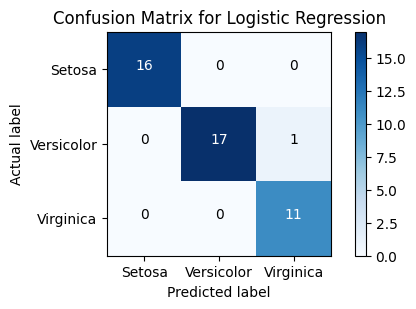

In [ ]:
model_one = LogisticRegression(max_iter=1000)


#  Fitting the data to Model one
model_one.fit(x_train, y_train)
y_pred_one = model_one.predict(x_test)


#  Cross validation
cv_results_one = cross_validate(model_one, X, Y, cv=5)
print('\n'+'*'*20+'\tLogistic Regression\t'+'*'*20+'\n\n')
print('Mean test score: ' + str(np.mean(cv_results_one['test_score'])))
print('Mean fit time: ' + str(np.mean(cv_results_one['fit_time'])))
print('Mean score time: ' + str(np.mean(cv_results_one['score_time'])))


#  Accuracy, and classification report
print('\nAccuracy of Logistic Regression on test set: {:.2f}'.format(model_one.score(x_test, y_test)))
class_report_one = classification_report(y_test, y_pred_one)
print('\nClassification Report:\n', class_report_one)


#Calculating and printing the confusion matrix
confusion_matrix_one = confusion_matrix(y_test, y_pred_one)
print('Confusion Matrix:\n')
print(confusion_matrix_one)
print('\n')

#  Plot for confusion matrix
plt.figure(figsize=(5, 3))
plot_confusion_matrix(confusion_matrix_one,'Confusion Matrix for Logistic Regression')
plt.show()



<h1><b>Model Two: Support Vector Machine</b>

  - Hyperparameters:
    - kernal('poly','rbf')
    - 'C' : [1,10]
    - svm.SVC()
  - Best parameters
    - C = 10
    - kernal = 'rbf'


********************	Support Vector Machine	********************


Best Parameters: {'C': 10, 'kernel': 'rbf'}
Mean test score: 0.9800000000000001
Mean fit time: 0.10444850921630859
Mean score time: 0.001841592788696289

Accuracy of Support Vector Machine on test set: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]




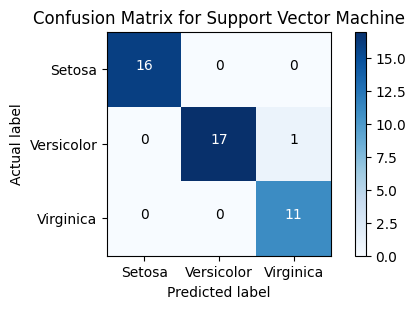

In [ ]:
#Setting up the svm model's parameters and using Grid search
parameters = {'kernel':('poly', 'rbf'), 'C':[1,10]}
svc = svm.SVC()
model_two = GridSearchCV(svc, parameters)


#  Fitting data to Model Two
model_two.fit(x_train, y_train)
y_pred_two = model_two.predict(x_test)


#  Calculating the best score
print('\n'+'*'*20+'\tSupport Vector Machine\t'+'*'*20+'\n\n')
best_params = model_two.best_params_
print('Best Parameters: '+ str(best_params))


#  Cross validation
cv_results_two = cross_validate(model_two, X, Y, cv=5)
print('Mean test score: ' + str(np.mean(cv_results_two['test_score'])))
print('Mean fit time: ' + str(np.mean(cv_results_two['fit_time'])))
print('Mean score time: ' + str(np.mean(cv_results_two['score_time'])))


#  Accuracy, classification report
print('\nAccuracy of Support Vector Machine on test set: {:.2f}'.format(model_two.score(x_test, y_test)))
class_report_two = classification_report(y_test, y_pred_two)
print('\nClassification Report:\n', class_report_two)

#  Calculating and printing the confusion matrix
confusion_matrix_two = confusion_matrix(y_test, y_pred_two)
print('Confusion Matrix:\n')
print(confusion_matrix_two)
print('\n')

#  Plot for confusion matrix
plt.figure(figsize=(5, 3))
plot_confusion_matrix(confusion_matrix_two,'Confusion Matrix for Support Vector Machine')
plt.show()


<h1><b>Model Three: Decision Tree Classifier</b>


********************	Decision Tree Classifier	********************


Mean test score: 0.9600000000000002
Mean fit time: 0.0024391651153564454
Mean score time: 0.0018893718719482423

Accuracy of Decision Tree classifier on test set: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]




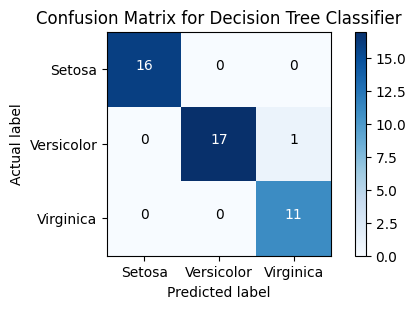

In [ ]:
model_three = DecisionTreeClassifier()


#  Fitting data to Model Three
model_three.fit(x_train, y_train)
y_pred_three = model_three.predict(x_test)


#  Cross validation
cv_results_three = cross_validate(model_three, X, Y, cv=5)
print('\n'+'*'*20+'\tDecision Tree Classifier\t'+'*'*20+'\n\n')
print('Mean test score: ' + str(np.mean(cv_results_three['test_score'])))
print('Mean fit time: ' + str(np.mean(cv_results_three['fit_time'])))
print('Mean score time: ' + str(np.mean(cv_results_three['score_time'])))


#  Accuracy, classification report
print('\nAccuracy of Decision Tree classifier on test set: {:.2f}'.format(model_three.score(x_test, y_test)))

class_report_three = classification_report(y_test, y_pred_three)
print('\nClassification Report:\n', class_report_three)


#Calculating and printing the confusion matrix
confusion_matrix_three = confusion_matrix(y_test, y_pred_three)
print('Confusion Matrix:\n')
print(confusion_matrix_three)
print('\n')


#  Plot for confusion matrix
plt.figure(figsize=(5, 3))
plot_confusion_matrix(confusion_matrix_three,'Confusion Matrix for Decision Tree Classifier')
plt.show()